In [272]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [273]:
def dist2d(x1,y1,x2,y2):
    # define a function to calculate the distance between two points:(x1,y1) and (x2,y2)
    return ((x1-x2)**2+(y1-y2)**2)

In [274]:
def interp(x,y,xg,yg,z,obs_std,back_std,back_radius):
    dist2=dist2d(x[:,np.newaxis],y[:,np.newaxis]\
             ,x[np.newaxis,:],y[np.newaxis,:])
    B=back_std**2*np.exp(-dist2/back_radius**2)
    X_grid=xg.reshape(np.size(xg))
    Y_grid=yg.reshape(np.size(yg))
    dist2=dist2d(X_grid[:,np.newaxis],Y_grid[:,np.newaxis],\
             x[np.newaxis,:],y[np.newaxis,:])
    Bi=back_std**2*np.exp(-dist2/back_radius**2)
    O=np.eye(len(x))*(obs_std**2)
    f_A=np.reshape(np.dot(np.dot(Bi,np.linalg.inv(O+B)),z),[len(xg),len(yg)])
    EA=back_std**2-np.diag(np.dot(np.dot(Bi,np.linalg.inv(O+B)),Bi.T))
    return f_A,EA
    

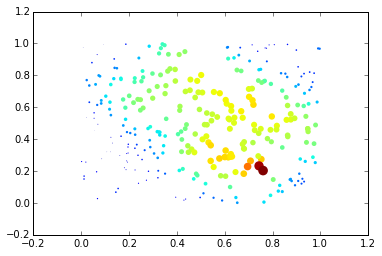

In [285]:
xa,ya,za=np.load('truth_A.npy')
plt.scatter(xa,ya,za**2,za,edgecolor='None')
yg,xg=np.mgrid[0:1:100j,0:1:100j]
obs_std=1
back_std=1
back_radius=0.2

In [286]:
f_Aa,EAb=interp(xa,ya,xg,yg,za,obs_std,back_std,back_radius)

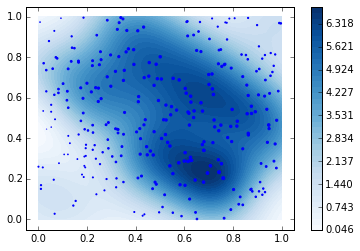

In [287]:
pla=plt.contourf(xg,yg,f_Aa,cmap='Blues',levels=np.linspace(np.min(f_Aa),np.max(f_Aa),40))
plt.scatter(xa,ya,za,color='b')
plt.colorbar(pla)

0.149807418826


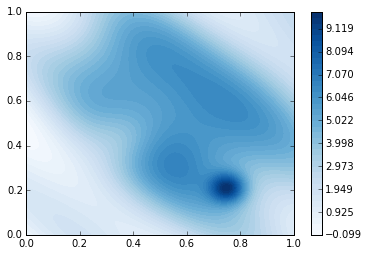

In [298]:
import truth
ta=truth.TruthA(xg,yg)
ta.z.shape
print(np.sum((f_Aa-ta.z)**2)/xg.size)
plb=plt.contourf(xg,yg,ta.z,cmap='Blues',levels=np.linspace(np.min(ta.z),np.max(ta.z),40))
plt.colorbar()

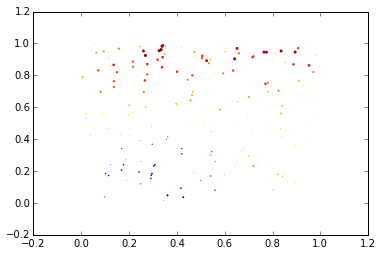

In [335]:
xb,yb,zb=np.load('truth_B.npy')
plt.scatter(xb,yb,zb**2,zb,edgecolor='None')
yg,xg=np.mgrid[0:1:100j,0:1:100j]
obs_std=0.5
back_std=0.5
back_radius=0.5

In [336]:
f_Ab,EAb=interp(xb,yb,xg,yg,zb,obs_std,back_std,back_radius)

/Users/wandi/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:764: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


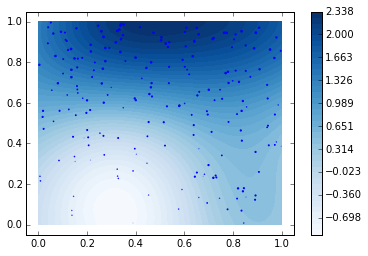

In [337]:
plb=plt.contourf(xg,yg,f_Ab,cmap='Blues',levels=np.linspace(np.min(f_Ab),np.max(f_Ab),40))
plt.scatter(xb,yb,zb,color='b')
plt.colorbar(plb)

0.553183339982


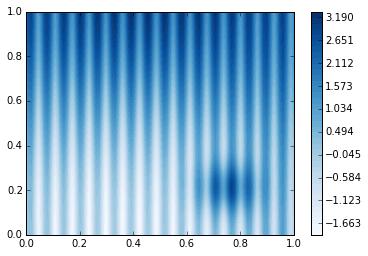

In [338]:
import truth
tb=truth.TruthB(xg,yg)
tb.z.shape
print(np.sum((f_Ab-tb.z)**2)/xg.size)
plb=plt.contourf(xg,yg,tb.z,cmap='Blues',levels=np.linspace(np.min(tb.z),np.max(tb.z),40))
plt.colorbar()